In [14]:
def load_data(file_path, data_type):
    import pandas as pd
    data_formats = ['csv', 'excel']
    if data_type not in data_formats:
        raise ValueError(f"Unsupported data type '{data_type}'")
    if data_type == 'csv':
        df = pd.read_csv(file_path)
    elif data_type == 'excel':
        df = pd.read_excel(file_path)
    return df

In [93]:
knn = load_data("knn_data.csv", "csv")

In [94]:
knn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Explaination of the data


    age:
        This column represents the age of the patient in years.

    sex:
        This column denotes the gender of the patient.
        0: Female
        1: Male

    cp (chest pain type):
        This column represents the type of chest pain experienced by the patient.
        0: Typical angina (chest pain related to decreased blood supply to the heart)
        1: Atypical angina
        2: Non-anginal pain
        3: Asymptomatic (no chest pain)

    trestbps (resting blood pressure):
        This column indicates the resting blood pressure of the patient in mm Hg (millimeters of mercury).

    chol (serum cholesterol):
        This column represents the serum cholesterol level in mg/dl (milligrams per deciliter).

    fbs (fasting blood sugar):
        This column indicates the fasting blood sugar level of the patient.
        0: Fasting blood sugar < 120 mg/dl
        1: Fasting blood sugar ≥ 120 mg/dl

    restecg (resting electrocardiographic results):
        This column represents the results of the resting electrocardiogram.
        0: Normal
        1: Abnormalities related to the ST-T wave
        2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach (maximum heart rate achieved):
        This column denotes the maximum heart rate achieved by the patient during exercise.

    exang (exercise-induced angina):
        This column indicates whether the patient experienced exercise-induced angina.
        0: No
        1: Yes

    oldpeak (ST depression induced by exercise relative to rest):
        This column represents the ST depression induced by exercise relative to rest.

    slope (slope of the peak exercise ST segment):
        This column denotes the slope of the peak exercise ST segment.
        0: Upsloping
        1: Flat
        2: Downsloping

    ca (number of major vessels colored by fluoroscopy):
        This column represents the number of major vessels colored by fluoroscopy.
        It typically indicates the number of major blood vessels supplying the heart.

    thal (thalassemia):
        This column denotes thalassemia, a blood disorder.
        0: Normal
        1: Fixed defect (no blood flow in some part of the heart)
        2: Reversible defect (blood flow is observed but not normal)

    target:
        This is the target variable.
        0: No heart disease
        1: Heart disease present

## Initial EDA

In [32]:
def some_info (df):
    divider = "-------------------------------------------------------------------------"
    print("Shape of Data Frame: \n", df.shape)
    print(divider)
    print("Info Stats of Data: \n", df.info())
    print(divider)
    print("Column Types: \n", df.dtypes)
    print(divider)
    print("Head (First 5 Rows): \n")
    print(divider)
    display(df.head())
    print(divider)
    print("Tail (Last 5 Rows): \n")
    display(df.tail())
    print(divider)
    #This is F5 which I have added here.
    print("Number of missing values: \n", df.isnull().sum())
    print(divider)
    print("Summary statistics of the dataset: \n")
    display(df.describe())

In [33]:
some_info(knn)

Shape of Data Frame: 
 (1025, 14)
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Info Stats of Data: 
 None
-------------------------------------------------------------------------
Column 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


-------------------------------------------------------------------------
Tail (Last 5 Rows): 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


-------------------------------------------------------------------------
Number of missing values: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
-------------------------------------------------------------------------
Summary statistics of the dataset: 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
# Function for numerical analysis
def num_analysis(df, prev_plot=None):
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    df_copy = df.copy()
    df_describe = df_copy.describe()
    type_input = str(input("Enter desired type of numerical analysis:\n1. plots\n2. normality tests\n"))

    if type_input == 'plots':
        plot_input = str(input("List of plots for numerical analysis:\n1. histogram\n2. boxplot\n3. qqplot\n"))
        plot_list = ['histogram', 'boxplot', 'qqplot']

        if plot_input in plot_list:
            if plot_input == 'histogram':
                df_copy.hist(figsize=(10, 8), bins=20, color='red', edgecolor='black')
                plt.title(f'Histogram of {df_copy}')
                plt.xlabel('Value')
                plt.ylabel('Frequency')
                plot = plt.show()
            elif plot_input == 'boxplot':
                df_copy.plot.box(figsize=(10, 8))
                plt.title(f'Boxplot of all columns in {df_copy}')
                plt.ylabel('Values')
                plot = plt.show()
            elif plot_input == 'qqplot':
                for col in df_copy.columns:
                    plt.figure(figsize=(8, 9))
                    stats.probplot(df_copy[col], plot=plt)
                    plt.title(f'QQ-Plot of {col}')
                    plot = plt.show()
            
            

    elif type_input == 'normality tests':
        normt_input = str(input("Enter one of the following commands to initiate a normality test:\n"
                                "'lt': Lilliefors Test (ideal for smaller datasets)\n"
                                "'swt': Shapiro-Wilk Test (ideal for medium-size datasets)\n"
                                "'dpt': D'Agostino and Pearson's Test (ideal for large datasets)\n"))
        normt_list = ['lt', 'swt', 'dpt']

        if normt_input in normt_list:
            normt_cols = df_copy.select_dtypes(include=['int64', 'float64', 'bool', 'complex'])
            if normt_input == 'swt':
                from scipy.stats import shapiro
                for col in normt_cols:
                    stat, p = shapiro(normt_cols[col])
                    print(f"Column: {col}, Shapiro-Wilk Test Statistic: {stat}, P-Value: {p}")
            elif normt_input == 'lt':
                from scipy.stats import lilliefors
                for col in normt_cols:
                    stat, p = lilliefors(normt_cols[col])
                    print(f"Lilliefors Test for column '{col}': Statistic: {stat}, P-Value: {p}")
            elif normt_input == 'dpt':
                from scipy.stats import normaltest
                for col in normt_cols:
                    stat, p = normaltest(normt_cols[col])
                    print(f"D'Agostino and Pearson Test for column '{col}': Statistic: {stat}, P-Value: {p}")

    else:
        print("Error: Please input from given options")
    return plot


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 histogram


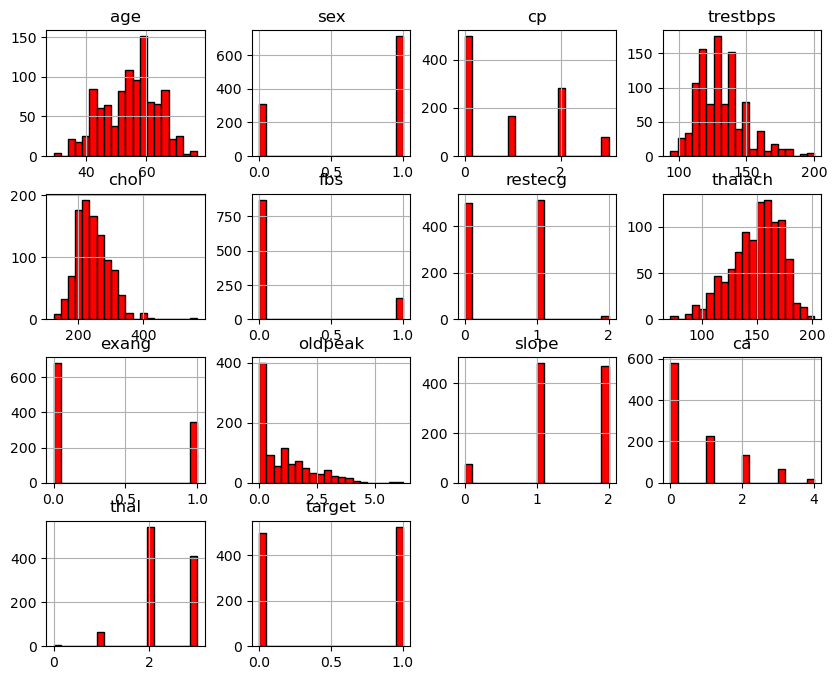

In [74]:
knn_hist1 = num_analysis1(knn)

In [40]:
def scatter_plots(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ask = str(input("Would you like to make scatter plots of 2 columns or multiple columns? (T/M) \n")).upper()
    if ask == 'T':
        x_col, y_col = str(input("Enter the two columns for x and y axis with a comma. \n")).split(', ')
        sns.scatterplot(x=x_col.strip(), y=y_col.strip(), data=df)
        plt.title(f"Scatter Plot: {x_col.strip()} vs {y_col.strip()}")
        plt.xlabel(x_col.strip())
        plt.ylabel(y_col.strip())
        plt.show()
    elif ask == 'M':
        sns.pairplot(df)
        plt.show()
        
        

Would you like to make scatter plots of 2 columns or multiple columns? (T/M) 
 M


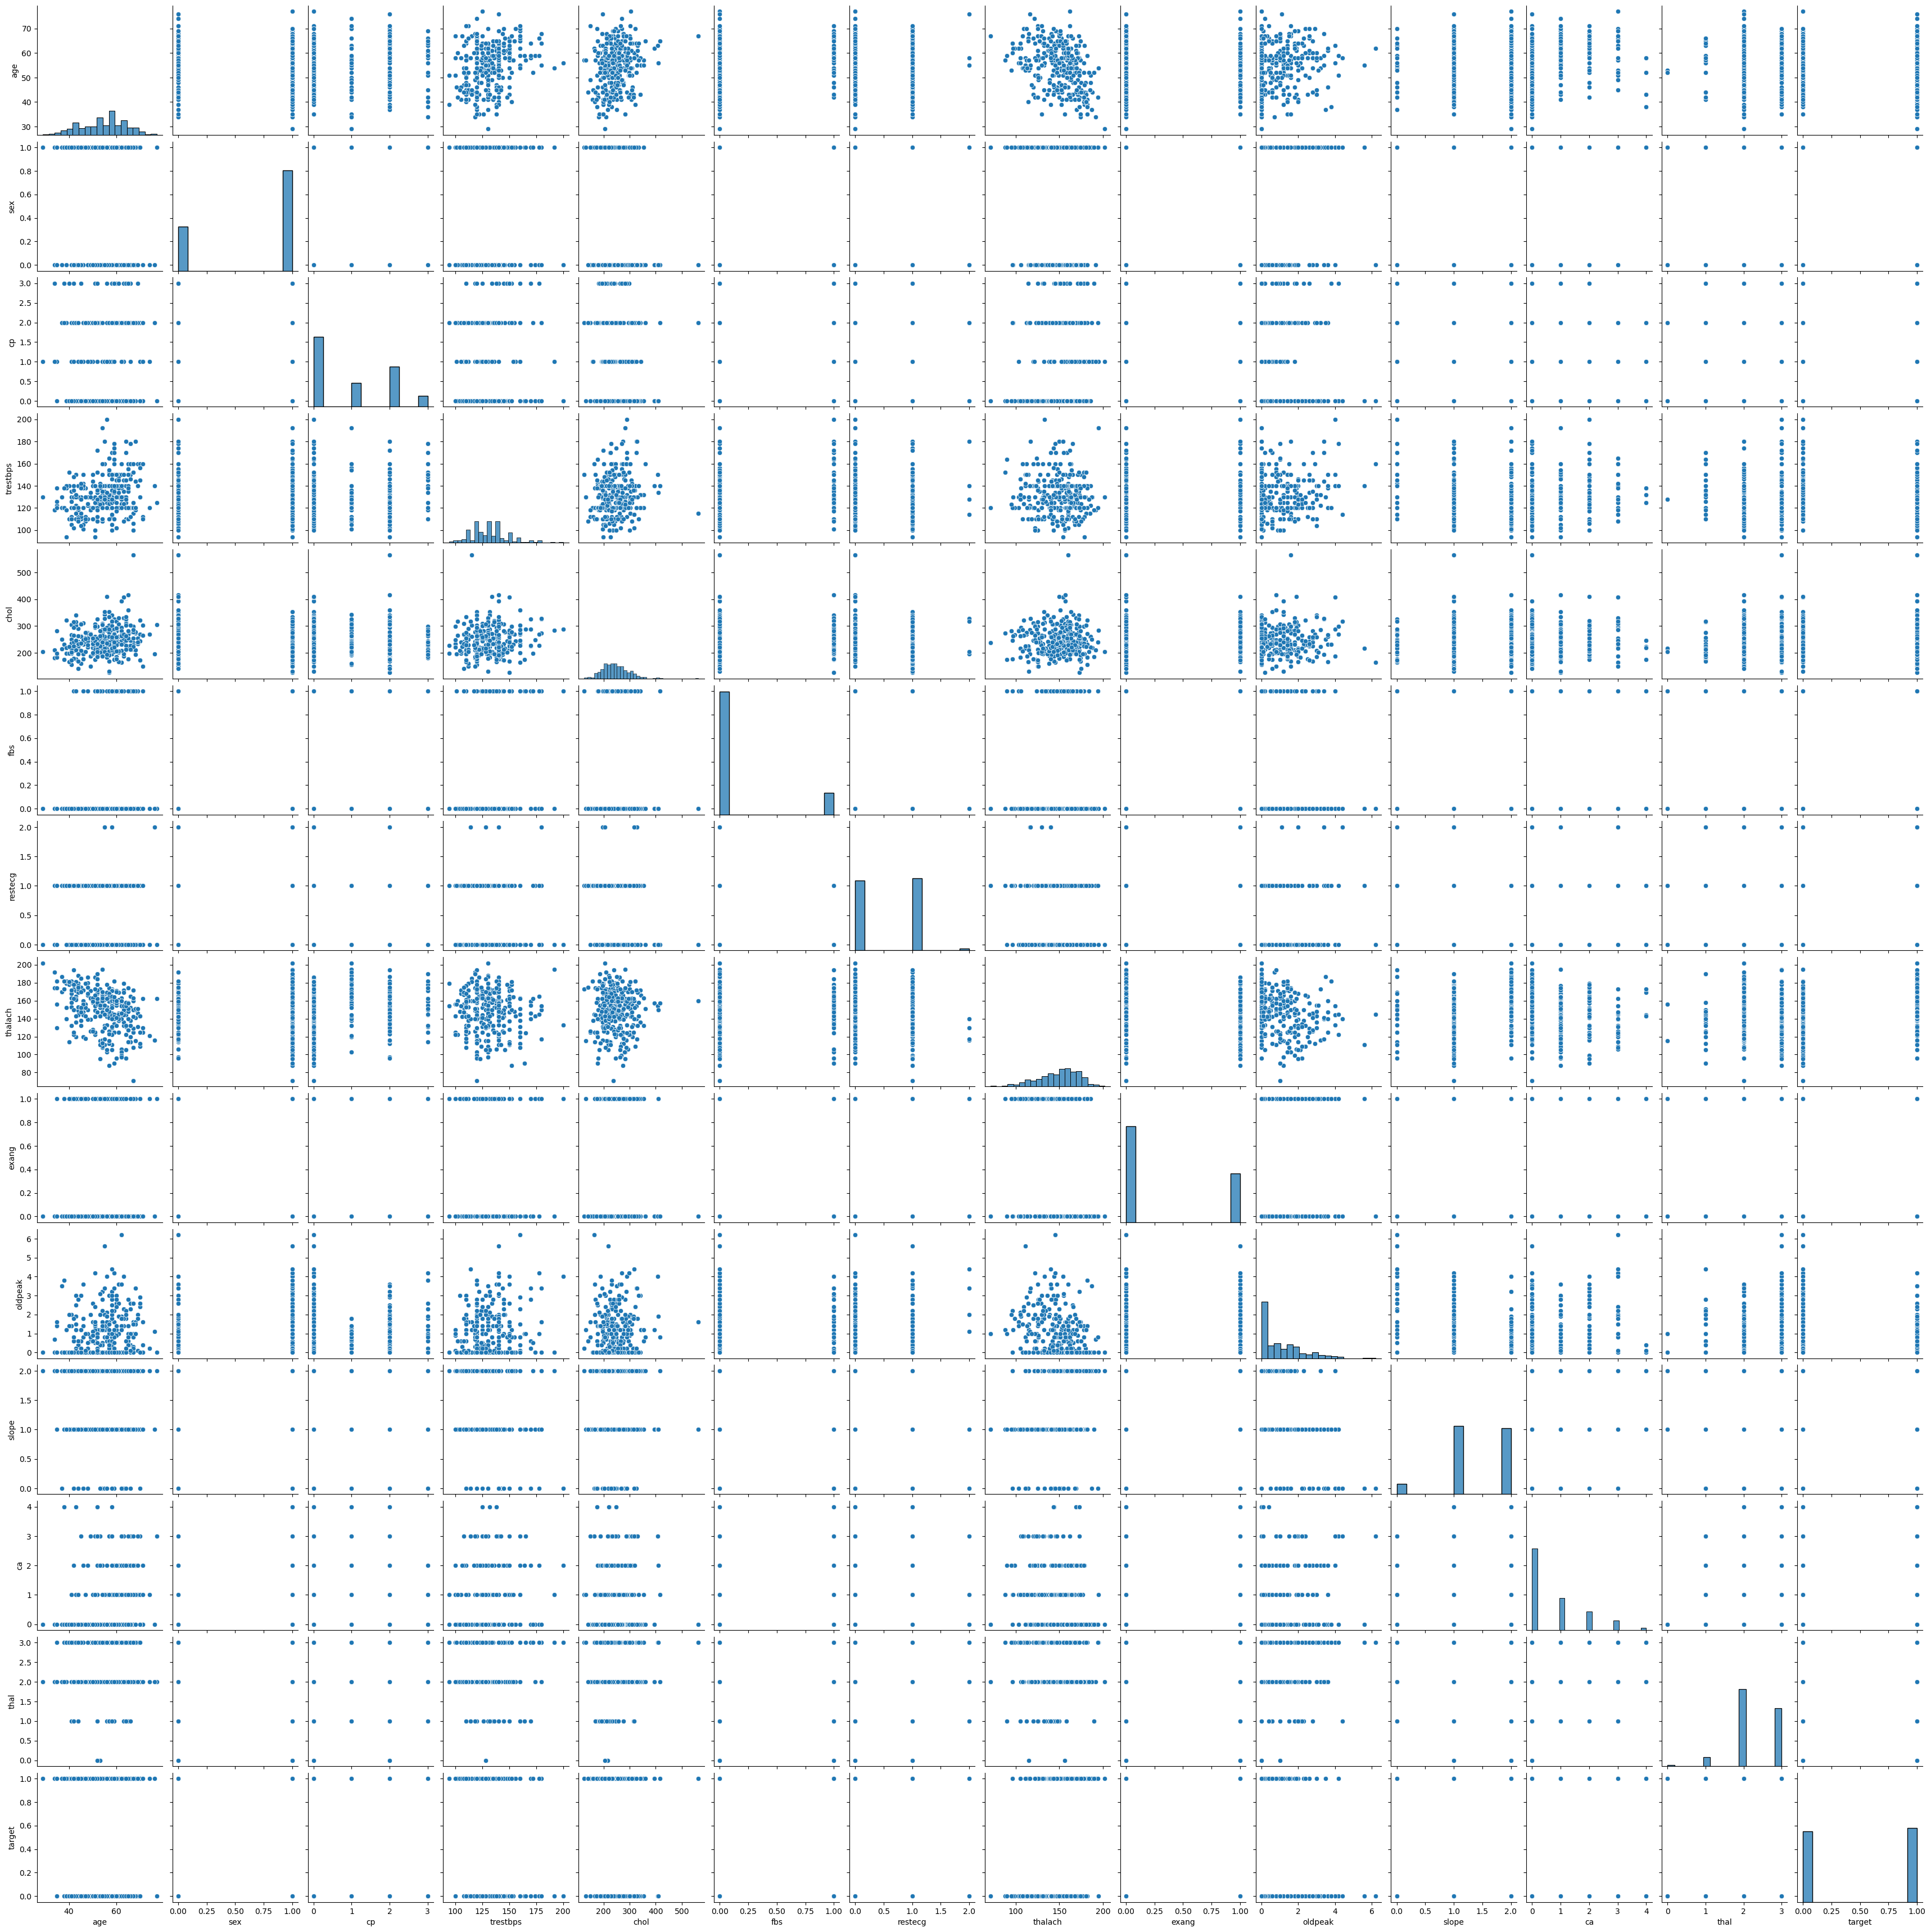

In [41]:
knn_sp1 = scatter_plots(knn)

## Outlier Removal

Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


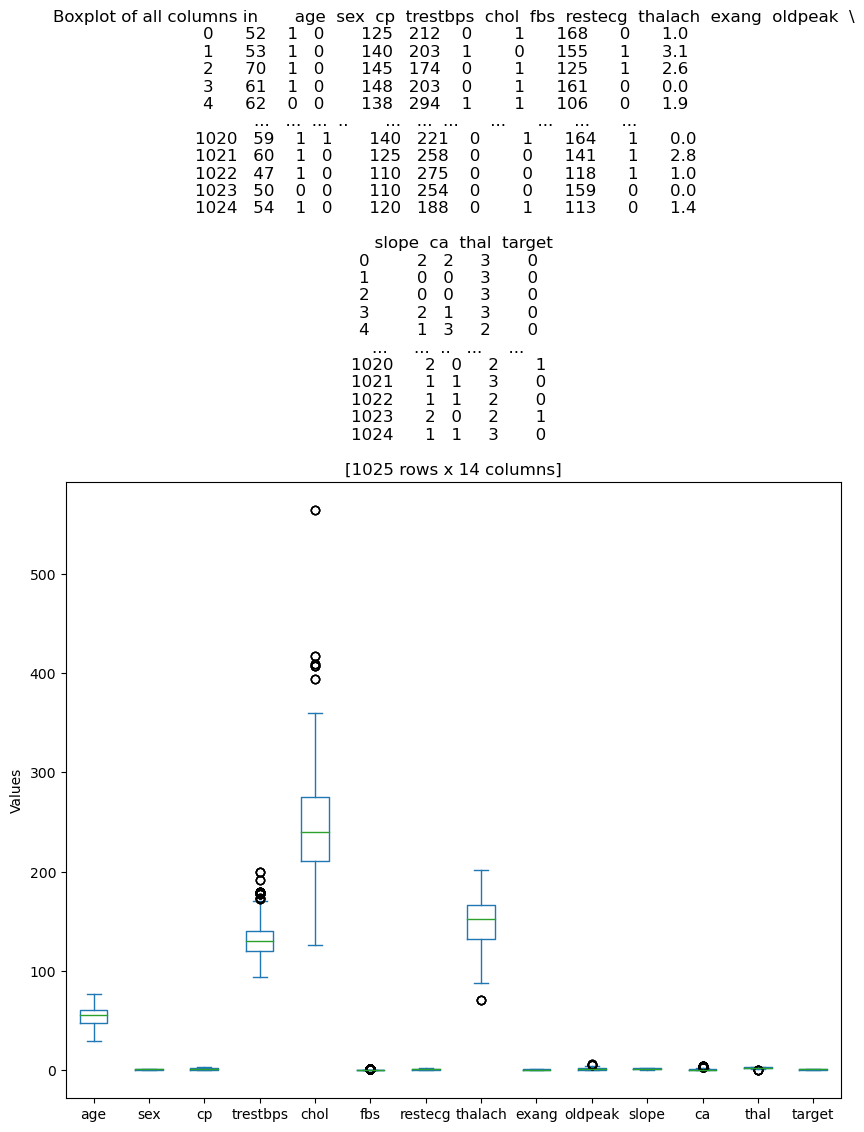

In [81]:
knn_boxplot1 = num_analysis(knn)

In [95]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

    return df_no_outliers

In [91]:
print(knn.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [99]:
column_name = "chol"
knn_outrem1 = remove_outliers(knn, column_name)

In [101]:
knn_outrem1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


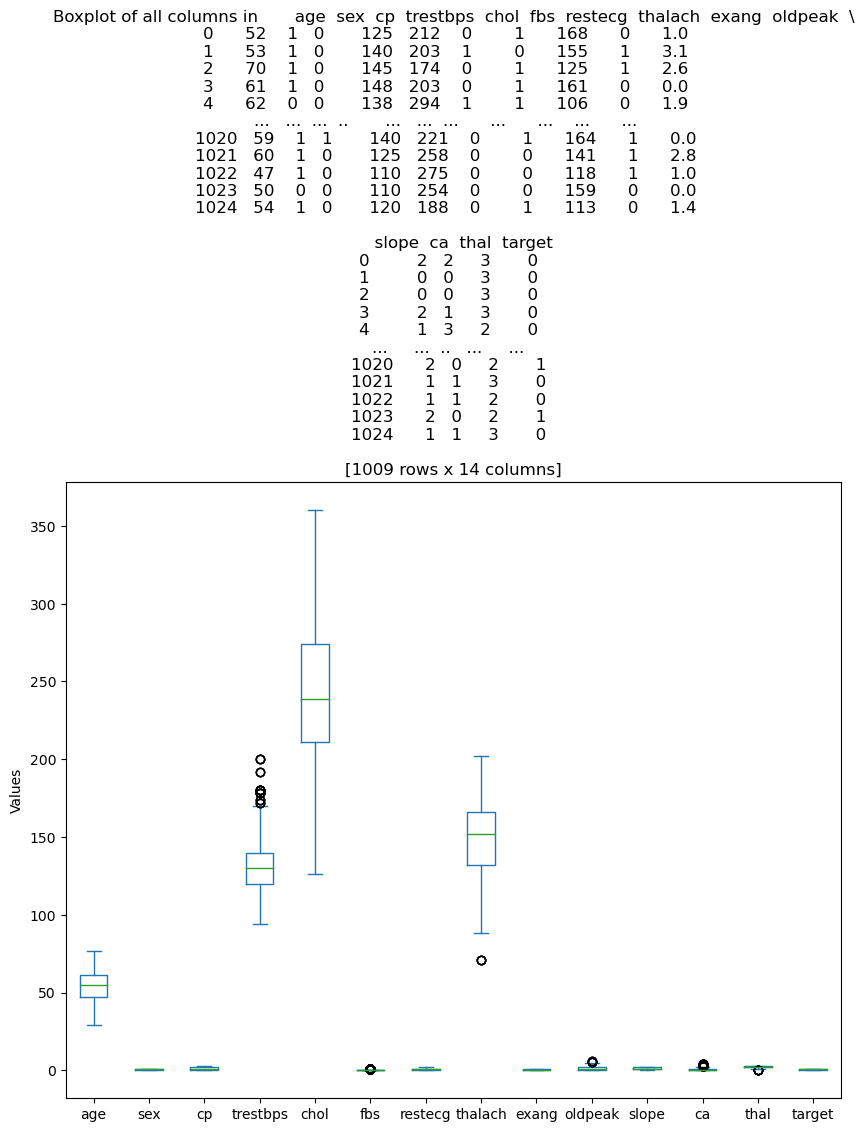

In [102]:
num_analysis(knn_outrem1)

In [106]:
knn_outrem2 = remove_outliers(knn_outrem1, "trestbps")

In [107]:
knn_outrem2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


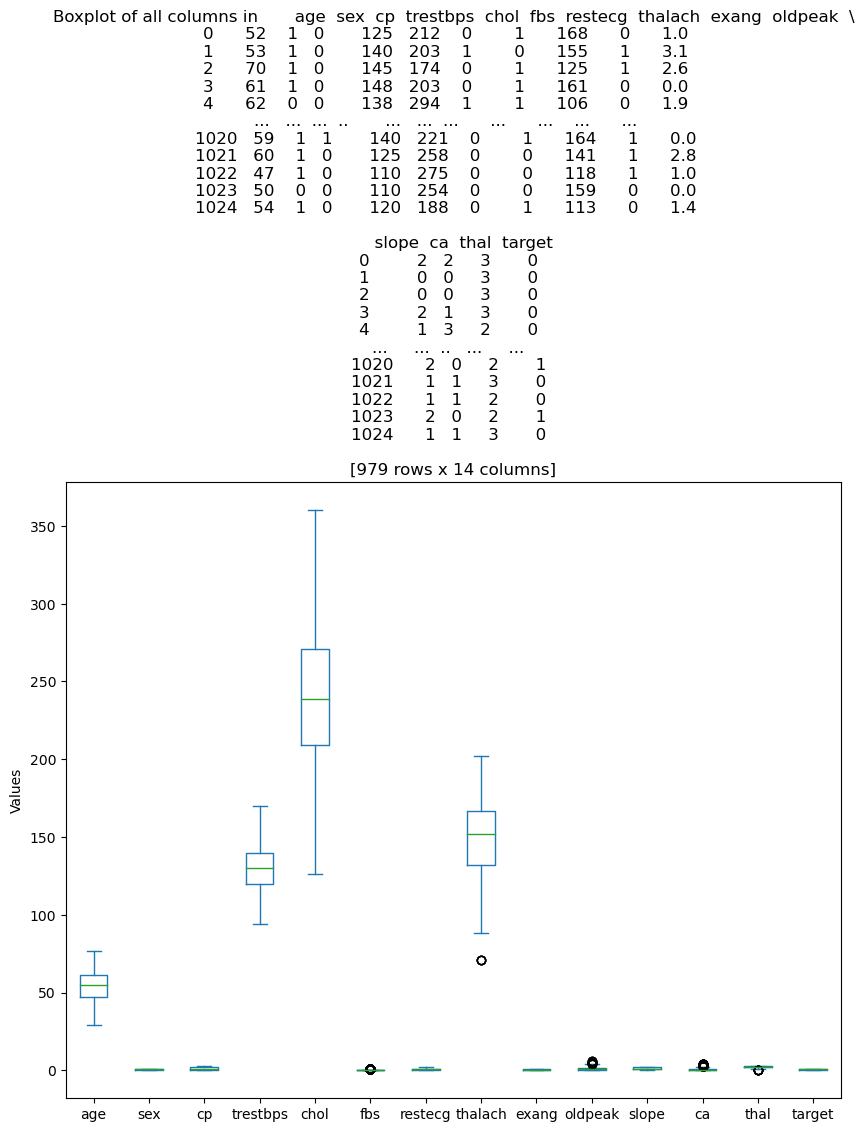

In [108]:
num_analysis(knn_outrem2)

In [110]:
knn_outrem3 = remove_outliers(knn_outrem2, "thalach")
knn_outrem3


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


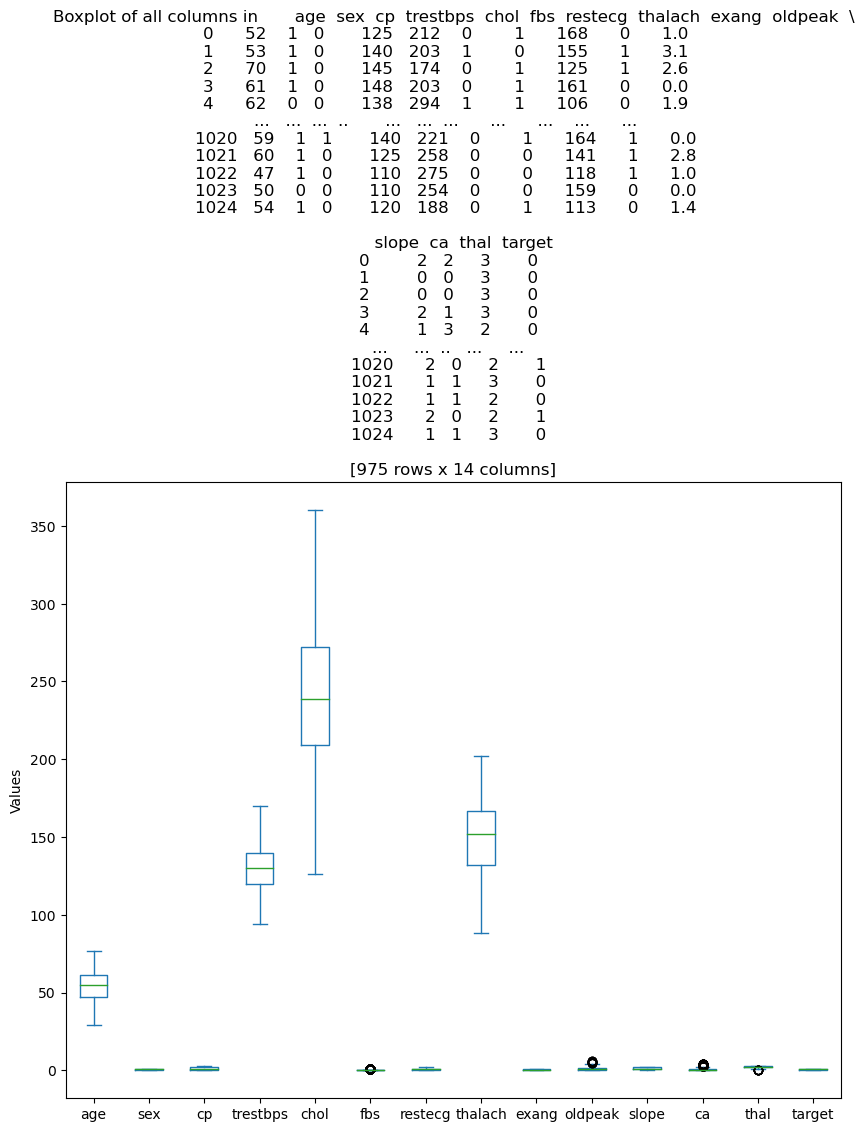

In [111]:
num_analysis(knn_outrem3)

Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


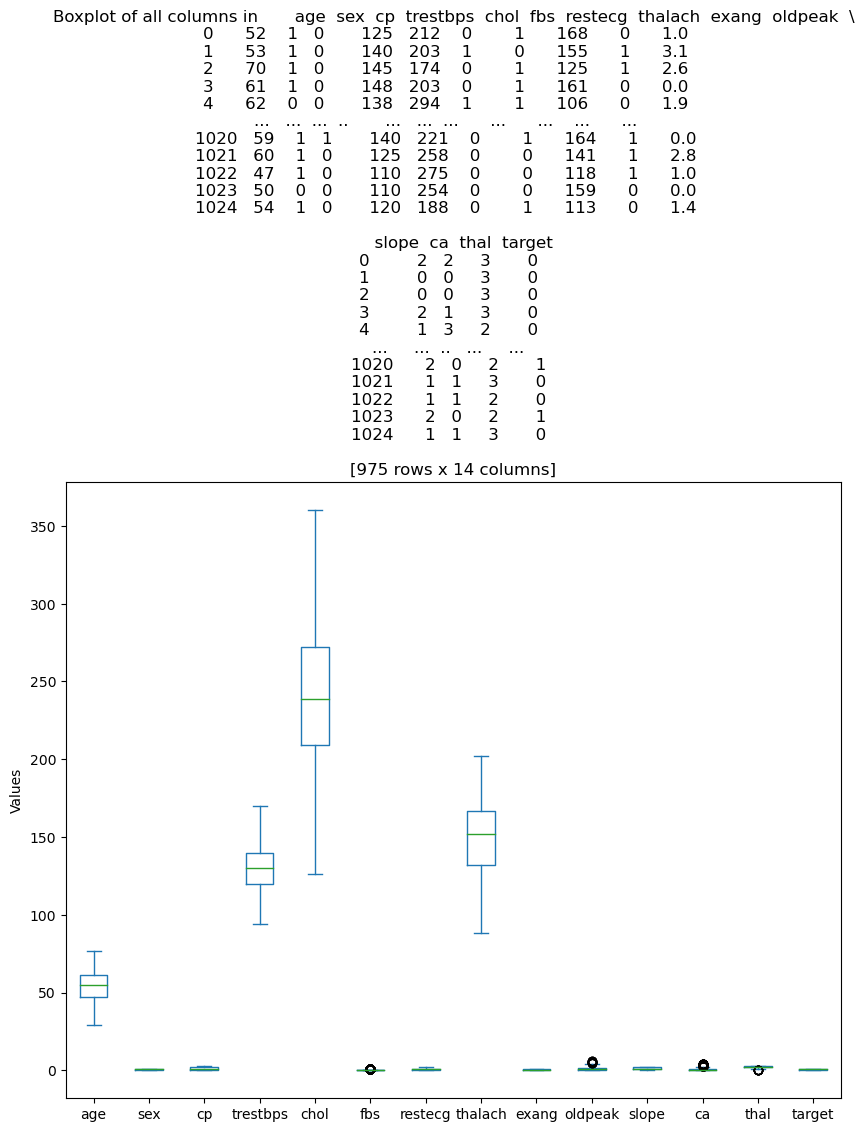

In [113]:
knn_outrem4 = remove_outliers(knn_outrem3, "thalach")
knn_outrem4
num_analysis(knn_outrem4)

In [117]:
knn_outrem5 = remove_outliers(knn_outrem4, "oldpeak")
knn_outrem5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


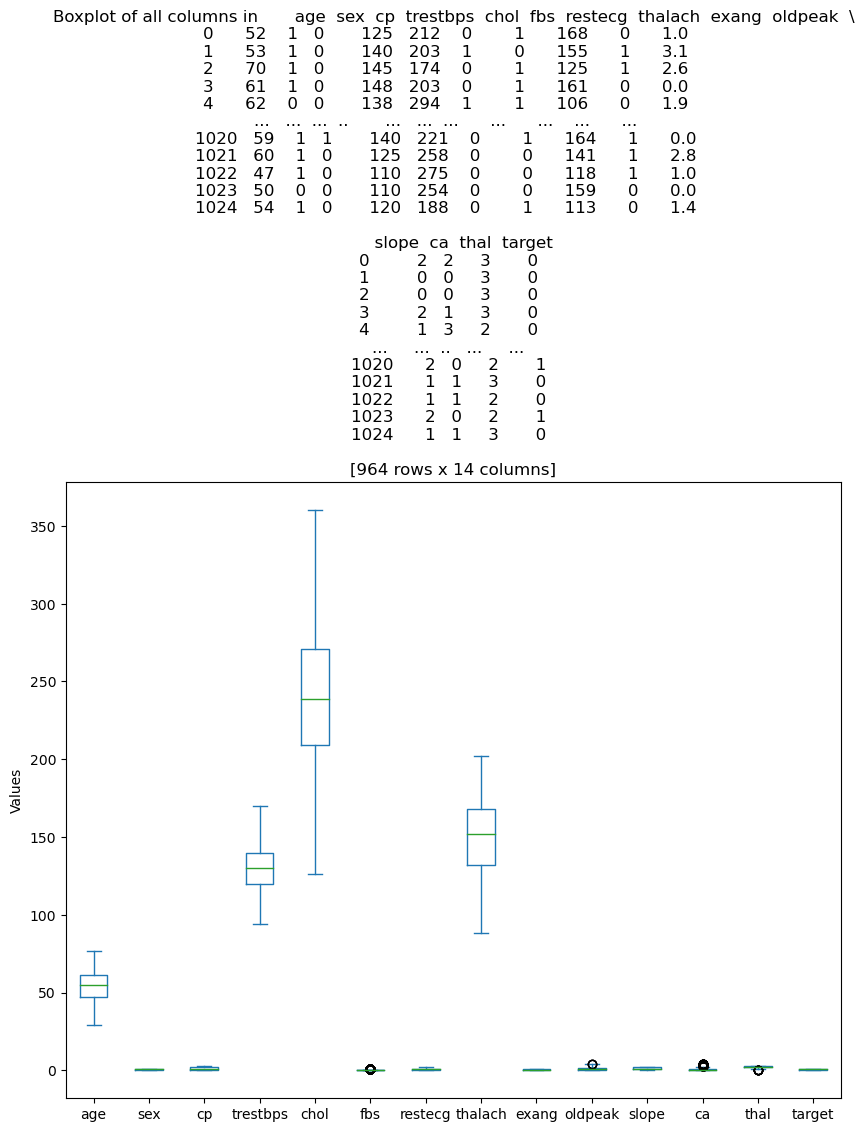

In [118]:

num_analysis(knn_outrem5)

In [119]:
knn_outrem6 = remove_outliers(knn_outrem5, "fbs")
knn_outrem6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


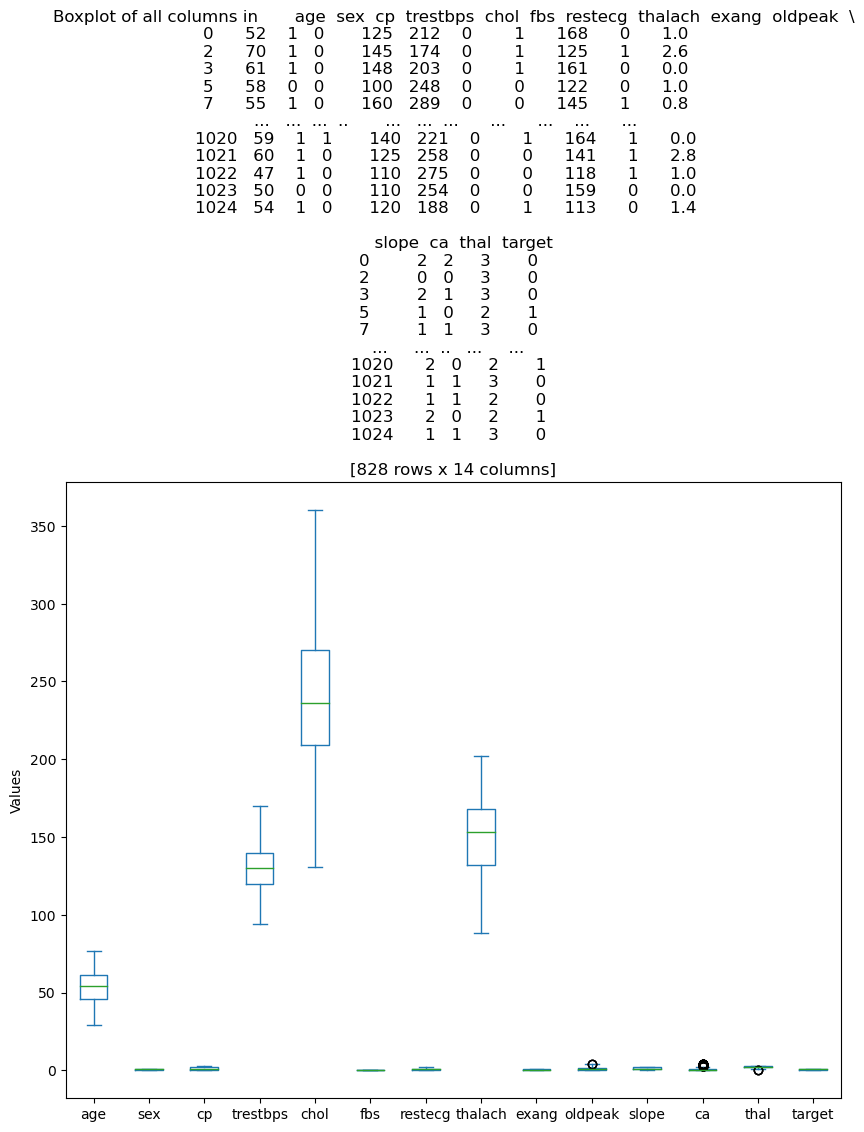

In [120]:
num_analysis(knn_outrem6)

In [121]:
knn_outrem7 = remove_outliers(knn_outrem6, "ca")
knn_outrem6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


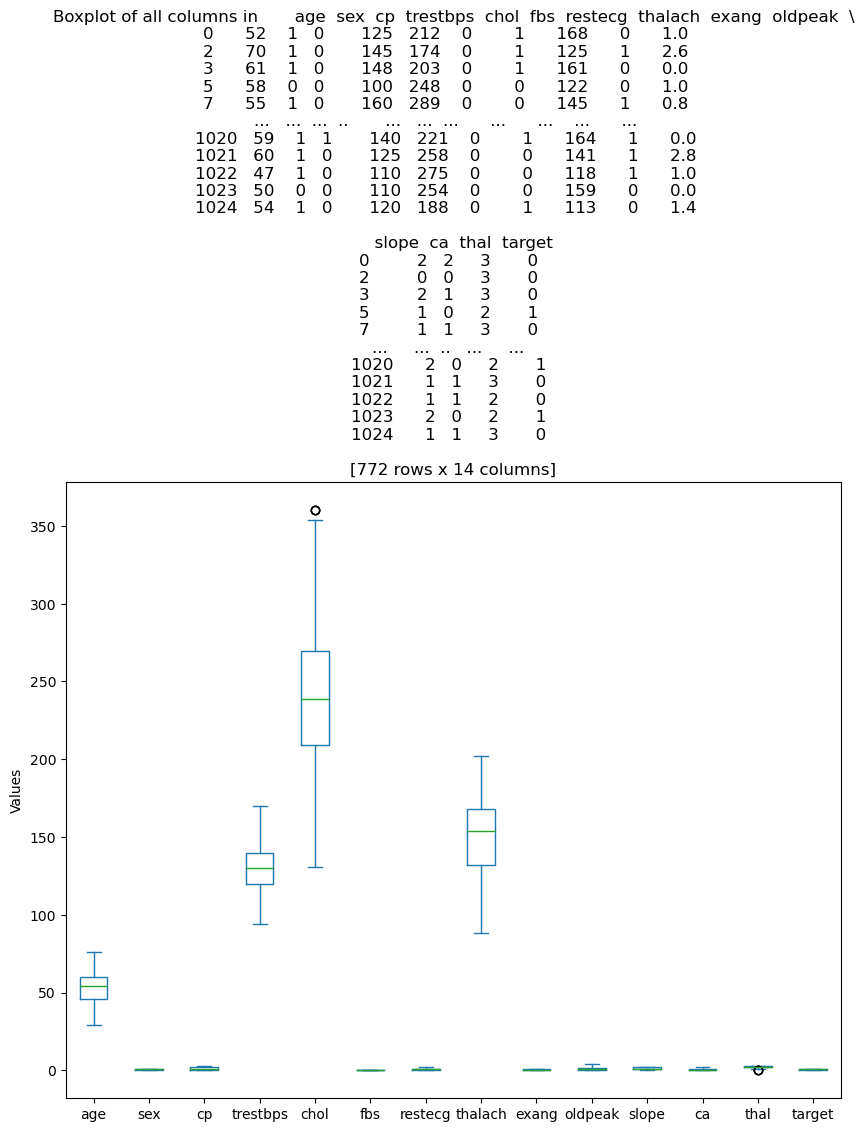

In [122]:
num_analysis(knn_outrem7)

In [125]:
knn_outrem8 = remove_outliers(knn_outrem7, "thal")
knn_outrem8

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


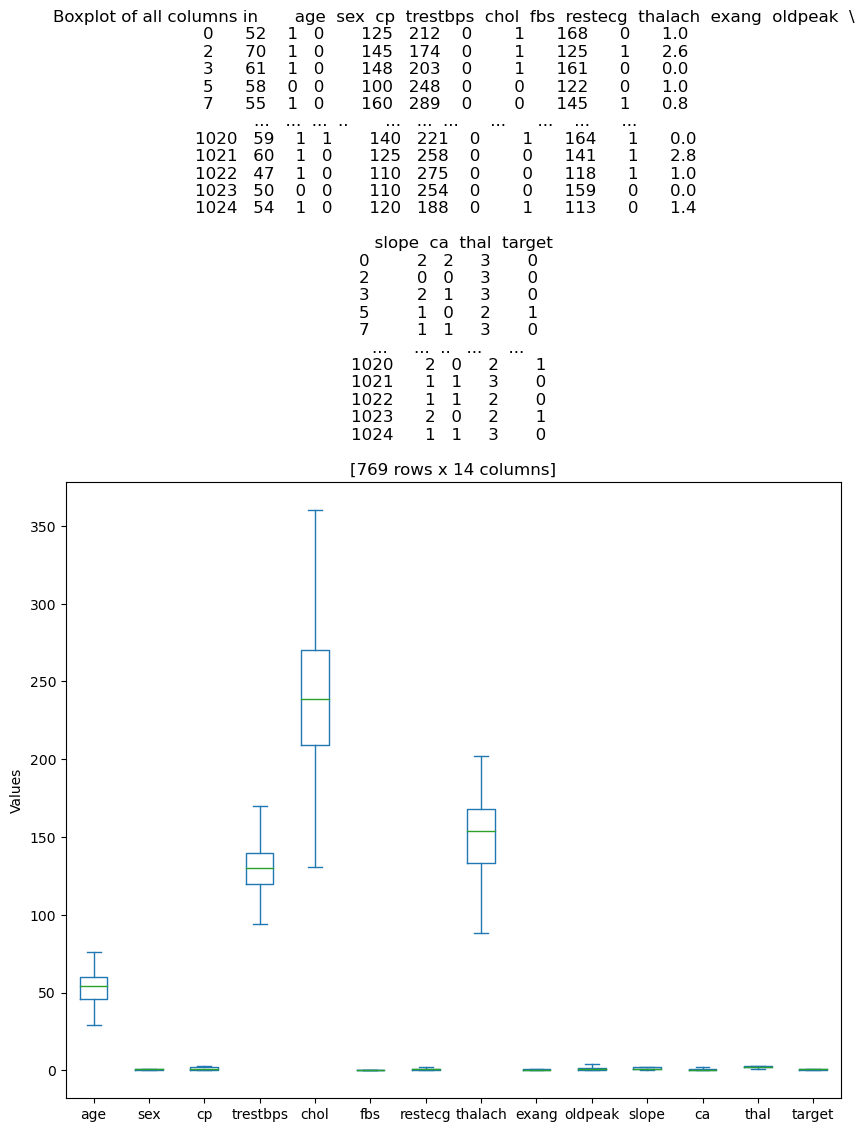

In [126]:
num_analysis(knn_outrem8)

Enter desired type of numerical analysis:
1. plots
2. normality tests
 plots
List of plots for numerical analysis:
1. histogram
2. boxplot
3. qqplot
 boxplot


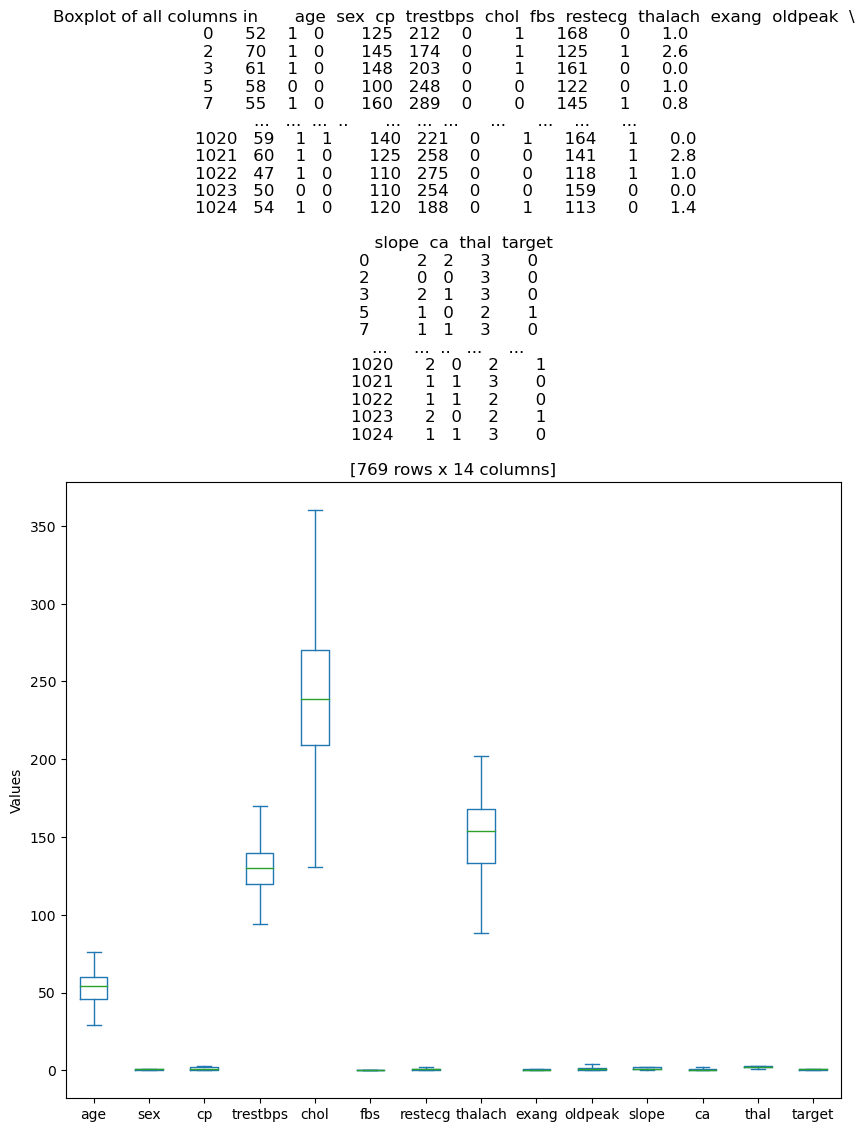

In [135]:
num_analysis(knn_outrem8)

All outliers removed.

In [133]:
knn = knn_outrem8

Removed duplicated values.

In [211]:
duplicates = knn.duplicated()
print(f"Number of duplicate rows = {duplicates.sum()}")

Number of duplicate rows = 0


In [210]:
knn = knn.drop_duplicates().copy()

In [258]:
#Here, we remove some features with constatnt values.

constant_features = knn.columns[knn.var() == 0]
print("Constant Features:", constant_features)

Constant Features: Index(['fbs'], dtype='object')


In [259]:
knn = knn.drop(['fbs'], axis = 1)

In [260]:
knn

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,125,0,0.0,2,0,2,0


In [261]:
#Function 15: Function to generate correlation heat maps.

def cr_heatmaps(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    ask_df = str(input("Would you like to create correaltion heat maps for the entire data frame or for specific columns? \n Entire 'e' for entire data frame or 'c' for selecting columns."))
    if ask_df == 'e':
        cr_matrix = df.corr()
        plt.figure(figsize=(10, 10))
        sns.heatmap(cr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    elif ask_df == 'c':
        print("Following are the columns in the given data frame: \n")
        df.info()
        ask_c = str(input("Enter the name of the columns you want to create a correlation heat map for with a comma followed by a space.")).split(', ')
        cr_matrix = df[ask_c].corr()
        plt.figure(figsize=(10, 10))
        sns.heatmap(cr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmaps')
        plt.show()
        
                 

Would you like to create correaltion heat maps for the entire data frame or for specific columns? 
 Entire 'e' for entire data frame or 'c' for selecting columns. e


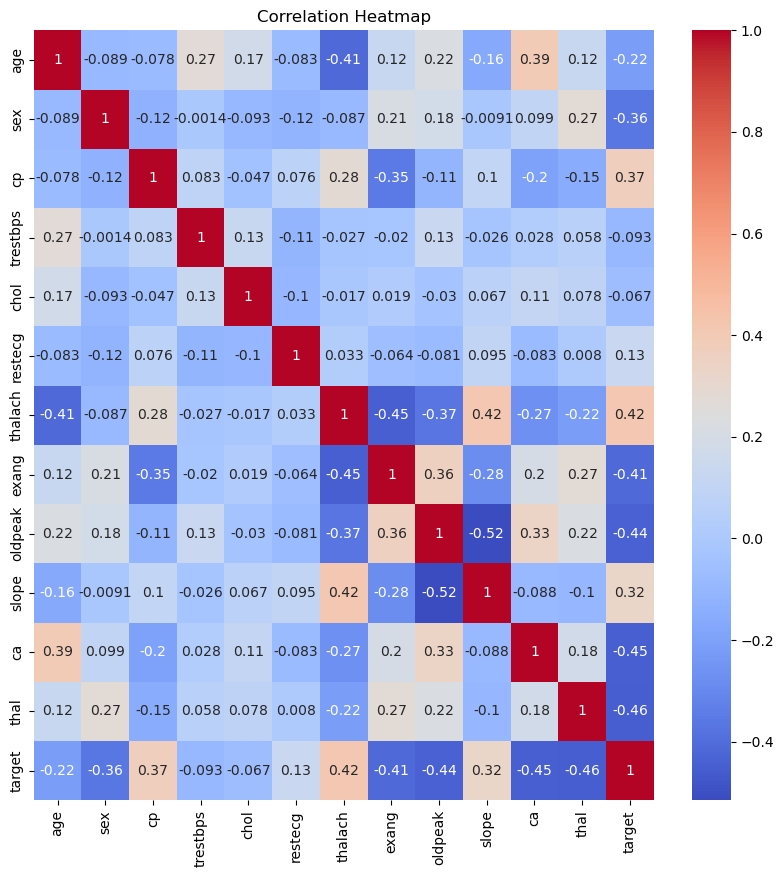

In [262]:
cr_heatmaps(knn)

# Preprocessing

Splitting the data

In [264]:
#Function for train-test splitting of data:

def tt_split(df):
    df_copy=df.copy()
    from sklearn.model_selection import train_test_split as tts
    import matplotlib.pyplot as plt
    print("The columns in given data frame are the following:")
    df_copy.info()
    target = str(input("Enter the target column you would like to predict: \n"))
    target_count = df_copy[target].value_counts()
    target_count.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Counts in Target Variable')
    plt.show()
    ci_input=str(input("The above displayed bar chart shows the class distribution of the the given target variable. Do you think it has class imbalance? \n (Y/N) \n")).upper()
    if ci_input == 'N':
        prop_input = float(input("Enter the desired percentage you would like to use for the train data size in floats (eg. for 80% write 0.8) \n"))
        x = df_copy.drop(columns=[target])
        y = df_copy[target]
        x_train, x_test, y_train, y_test = tts(x, y, train_size=prop_input, random_state=2)
        
        print("x_train shape: \n", x_train.shape)
        print("x_test shape: \n", x_test.shape)
        print("y_train shape: \n", y_train.shape)
        print("y_test shape: \n", y_test.shape)
        return x_train, x_test, y_train, y_test
    elif ci_input == 'Y':
        prop_input = float(input("Enter the desired percentage you would like to use for the train data size in floats (eg. for 80% write 0.8) \n"))
        x = df_copy.drop(columns=[target])
        y = df_copy[target]
        x_train, x_test, y_train, y_test = tts(x, y, train_size=prop_input, stratify=y, random_state=2)
        y_train_counts = y_train.groupby(y_train).count()
        y_test_counts = y_test.groupby(y_test).count()
        
            
        print("y_train class distribution:", y_train_counts)
        print("y_test class distribution:", y_test_counts)
        
        print("x_train shape: \n", x_train.shape)
        print("x_test shape: \n", x_test.shape)
        print("y_train shape: \n", y_train.shape)
        print("y_test shape: \n", y_test.shape)
        return x_train, x_test, y_train, y_test
        
    

        
    

The columns in given data frame are the following:
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 878
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   restecg   228 non-null    int64  
 6   thalach   228 non-null    int64  
 7   exang     228 non-null    int64  
 8   oldpeak   228 non-null    float64
 9   slope     228 non-null    int64  
 10  ca        228 non-null    int64  
 11  thal      228 non-null    int64  
 12  target    228 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 24.9 KB


Enter the target column you would like to predict: 
 target


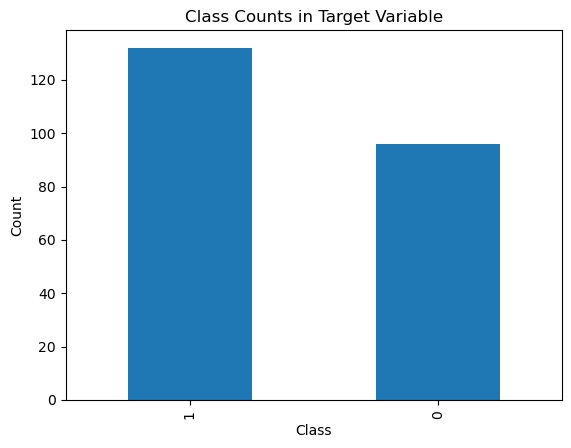

The above displayed bar chart shows the class distribution of the the given target variable. Do you think it has class imbalance? 
 (Y/N) 
 n
Enter the desired percentage you would like to use for the train data size in floats (eg. for 80% write 0.8) 
 0.8


x_train shape: 
 (182, 12)
x_test shape: 
 (46, 12)
y_train shape: 
 (182,)
y_test shape: 
 (46,)


In [265]:
x_train, x_test, y_train, y_test = tt_split(knn)

## Feature Selection

Using KBest Feature Selection Method:

In [266]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest (score_func=f_classif, k=10)
X_train_selected = k_best.fit_transform(x_train, y_train)
X_test_selected = k_best.transform(x_test)


In [236]:
x_test1 = x_test

In [267]:
some_info(x_test1)

Shape of Data Frame: 
 (46, 12)
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 611 to 8
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       46 non-null     int64  
 1   sex       46 non-null     int64  
 2   cp        46 non-null     int64  
 3   trestbps  46 non-null     int64  
 4   chol      46 non-null     int64  
 5   restecg   46 non-null     int64  
 6   thalach   46 non-null     int64  
 7   exang     46 non-null     int64  
 8   oldpeak   46 non-null     float64
 9   slope     46 non-null     int64  
 10  ca        46 non-null     int64  
 11  thal      46 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 4.7 KB
Info Stats of Data: 
 None
-------------------------------------------------------------------------
Column Types: 
 age           int64
sex           int64
cp            int64
trestbps      int64
c

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
611,55,0,0,128,205,2,130,1,2.0,1,1,3
349,62,0,2,130,263,1,97,0,1.2,1,1,3
32,57,1,0,130,131,1,115,1,1.2,1,1,3
198,60,0,2,102,318,1,160,0,0.0,2,1,2
107,62,1,1,120,281,0,103,0,1.4,1,1,3


-------------------------------------------------------------------------
Tail (Last 5 Rows): 



,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
41,54,1,2,120,258,0,147,0,0.4,1,0,3
437,67,1,0,120,229,0,129,1,2.6,1,2,3
26,44,1,2,130,233,1,179,1,0.4,2,0,2
291,58,1,0,128,259,0,130,1,3.0,1,2,3
8,46,1,0,120,249,0,144,0,0.8,2,0,3


-------------------------------------------------------------------------
Number of missing values: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
-------------------------------------------------------------------------
Summary statistics of the dataset: 



,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,54.260870,0.630435,0.956522,128.565217,250.043478,0.521739,150.673913,0.304348,0.986957,1.521739,0.543478,2.369565
std,9.265071,0.488021,0.987849,14.103825,48.991590,0.547281,23.582531,0.465215,1.134824,0.547281,0.751488,0.531610
min,34.000000,0.000000,0.000000,100.000000,131.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,46.750000,0.000000,0.000000,120.000000,221.500000,0.000000,130.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,128.000000,258.000000,0.500000,156.000000,0.000000,0.700000,2.000000,0.000000,2.000000
75%,60.750000,1.000000,2.000000,140.000000,277.000000,1.000000,170.750000,1.000000,1.400000,2.000000,1.000000,3.000000
max,68.000000,1.000000,3.000000,160.000000,360.000000,2.000000,182.000000,1.000000,3.600000,2.000000,2.000000,3.000000


In [268]:
some_info(x_train1)

Shape of Data Frame: 
 (182, 12)
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 113 to 337
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       182 non-null    int64  
 1   sex       182 non-null    int64  
 2   cp        182 non-null    int64  
 3   trestbps  182 non-null    int64  
 4   chol      182 non-null    int64  
 5   restecg   182 non-null    int64  
 6   thalach   182 non-null    int64  
 7   exang     182 non-null    int64  
 8   oldpeak   182 non-null    float64
 9   slope     182 non-null    int64  
 10  ca        182 non-null    int64  
 11  thal      182 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 18.5 KB
Info Stats of Data: 
 None
-------------------------------------------------------------------------
Column Types: 
 age           int64
sex           int64
cp            int64
trestbps      in

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
113,57,1,0,110,335,1,143,1,3.0,1,1,3
3,61,1,0,148,203,1,161,0,0.0,2,1,3
633,61,1,0,138,166,0,125,1,3.6,1,1,2
5,58,0,0,100,248,0,122,0,1.0,1,0,2
382,59,1,0,110,239,0,142,1,1.2,1,1,3


-------------------------------------------------------------------------
Tail (Last 5 Rows): 



,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
67,42,1,0,136,315,1,125,1,1.8,1,0,1
34,50,1,2,129,196,1,163,0,0.0,2,0,2
116,63,1,0,130,254,0,147,0,1.4,1,1,3
23,63,0,2,135,252,0,172,0,0.0,2,0,2
337,54,1,2,125,273,0,152,0,0.5,0,1,2


-------------------------------------------------------------------------
Number of missing values: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
-------------------------------------------------------------------------
Summary statistics of the dataset: 



,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,53.098901,0.686813,0.939560,128.697802,240.434066,0.554945,151.170330,0.318681,0.935714,1.434066,0.461538,2.302198
std,9.230690,0.465069,1.030837,15.684806,43.001138,0.509309,22.275488,0.467251,1.011857,0.597919,0.686213,0.567923
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45.000000,0.000000,0.000000,120.000000,208.250000,0.000000,138.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,54.000000,1.000000,1.000000,130.000000,235.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000
75%,59.750000,1.000000,2.000000,140.000000,268.750000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,76.000000,1.000000,3.000000,170.000000,354.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000


Applying the Standard Scaler

In [269]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest (score_func=f_classif, k=10)
X_train_selected = k_best.fit_transform(x_train1, y_train)
X_test_selected = k_best.transform(x_test1)
selected_feature_indices = k_best.get_support(indices=True)
print("Selected Feature Indices \n:", selected_feature_indices)

Selected Feature Indices 
: [ 0  1  2  5  6  7  8  9 10 11]


After Feature Selection is done, we apply a Standard Scaler, as KNN is sensitive to features with high scaling, or distance between them, leading to biased results, as KNN primarily works on distance. Standard Scaling will ensure the mean and standard deviation of all features will be reduced to 0 and 1, respectively. 

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_selected)
x_test_scaled = scaler.transform(X_test_selected)

In [271]:
display(x_train_scaled)

array([[ 0.42378854,  0.67527772, -0.91396817, ..., -0.72796375,
         0.78685041,  1.23208098],
       [ 0.85832102,  0.67527772, -0.91396817, ...,  0.94911729,
         0.78685041,  1.23208098],
       [ 0.85832102,  0.67527772, -0.91396817, ..., -0.72796375,
         0.78685041, -0.53357838],
       ...,
       [ 1.07558726,  0.67527772, -0.91396817, ..., -0.72796375,
         0.78685041,  1.23208098],
       [ 1.07558726, -1.48087219,  1.03155471, ...,  0.94911729,
        -0.67444321, -0.53357838],
       [ 0.09788918,  0.67527772,  1.03155471, ..., -2.4050448 ,
         0.78685041, -0.53357838]])

## Training and Evaluating the Model


After applying the Standar Scaler, we need to train the KNN model. But in order to do that, we need to find the optimal number of 'n_neighbors' parameter. For that, we run a Grid Search to generate a cross-validation score.

In [272]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': list(range(1, 20))}
knn_model = KNeighborsClassifier()


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


results_df = pd.DataFrame(grid_search.cv_results_)
print("Detailed Results:")
print(results_df[['params', 'mean_test_score', 'std_test_score']])


Best Parameters: {'n_neighbors': 16}
Best Cross-Validation Score: 0.867867867867868
Detailed Results:
                 params  mean_test_score  std_test_score
0    {'n_neighbors': 1}         0.758709        0.082084
1    {'n_neighbors': 2}         0.742042        0.042688
2    {'n_neighbors': 3}         0.752853        0.045709
3    {'n_neighbors': 4}         0.802402        0.046577
4    {'n_neighbors': 5}         0.818769        0.056702
5    {'n_neighbors': 6}         0.802553        0.051223
6    {'n_neighbors': 7}         0.802553        0.060403
7    {'n_neighbors': 8}         0.813363        0.063653
8    {'n_neighbors': 9}         0.813363        0.072707
9   {'n_neighbors': 10}         0.830030        0.072189
10  {'n_neighbors': 11}         0.846096        0.079795
11  {'n_neighbors': 12}         0.840691        0.073179
12  {'n_neighbors': 13}         0.835135        0.070307
13  {'n_neighbors': 14}         0.851502        0.081774
14  {'n_neighbors': 15}         0.840541   

In [248]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=16)
knn_model.fit(x_train_scaled, y_train)
y_pred = knn_model.predict(x_test_scaled)


Evaluating the model

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Break down and print the values of the confusion matrix
print("\nConfusion Matrix Breakdown:")
print(f"True Positives (TP): {cm[1, 1]}")
print(f"True Negatives (TN): {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[14  7]
 [ 3 22]]

Confusion Matrix Breakdown:
True Positives (TP): 22
True Negatives (TN): 14
False Positives (FP): 7
False Negatives (FN): 3

Accuracy: 0.78
Precision: 0.76
Recall: 0.88
F1 Score: 0.81


In [273]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.76      0.88      0.81        25

    accuracy                           0.78        46
   macro avg       0.79      0.77      0.78        46
weighted avg       0.79      0.78      0.78        46





The model performs reasonably well, with an overall accuracy of 78%. It exhibits a balance between precision and recall for both classes, correctly identifying instances of no heart disease 82% of the time and instances of heart disease 76% of the time. The recall values of 67% for no heart disease and 88% for heart disease indicate a decent ability to capture instances of both classes. The F1-score, a harmonic mean of precision and recall, is 0.78, suggesting a fair trade-off between precision and recall. The macro-average F1-score and precision, considering class imbalance, are 0.78. While the model shows promise, but further refinement and analysis could go a long way in bringing improvements. Hyper-parameter tuning should be explored to make the model more robust, as it has potential to be a lot more accurate.